In [32]:
#Dependancies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [33]:
#Load Data  
load_AirlineDelayData = 'AirportDelays/delay.csv'
AirlineDelayData = pd.read_csv(load_AirlineDelayData)

#Create path to output clean data to .csv all airline carriers
AirlineDelayEntireDS_CleanOutput = Path('AirportDelays/delayCleanDataEntireDS.csv')
AirlineDelayEntireDS_CleanOutput.parent.mkdir(parents=True, exist_ok=True) 

#Create path to output clean data to .csv for the 5 specified AirlineCarriers
AirlineDelay5Carriers_CleanOutput = Path('AirportDelays/delayCleanData5CarriersDS.csv')
AirlineDelay5Carriers_CleanOutput.parent.mkdir(parents=True, exist_ok=True) 

##Create path to output clean data to .csv for the 10 specified Airports
AirlineDelayAirports_CleanOutput = Path('AirportDelays/delayCleanData10AirportDS.csv')
AirlineDelayAirports_CleanOutput.parent.mkdir(parents=True, exist_ok=True) 



In [34]:
#Create DataFrame and Remove all NaN Values and Reset Index IDs
df_AirlineDelay = pd.DataFrame(AirlineDelayData)
df_AirlineDelayCleanDS = df_AirlineDelay.dropna().reset_index(drop=True)
df_AirlineDelayCleanDS 
#Place Data into CSV file

df_AirlineDelayCleanDS.to_csv(AirlineDelayEntireDS_CleanOutput)

In [35]:
df_AirlineDelayCleanDS = df_AirlineDelayCleanDS.rename(columns={"year": "Year"})

"""#Rename the columns in the original dataframe to be easier to read.  Use the updated column names for programming.
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"month": "Month"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier": "Airline"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_name": "Airline_Name"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport": "Airport"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport_name": "Airport_Name"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_flights": "Arrived"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_del15": "Delayed"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_ct": "D-Airline"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"weather_ct": "D-Weather"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"nas_ct": "D-NAS"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"security_ct": "D-Security"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"late_aircraft_ct": "D-Late_Plane"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_cancelled": "Cancelled"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_diverted": "Diverted"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_delay": "Time Delay"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_delay": "Time-Airline"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"weather_delay": "Time-Weather"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"nas_delay": "Time-NAS"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"security_delay": "Time-Security"})
df_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"late_aircraft_delay": "Time-Late_Plane"})
#print(df_AirlineDelayEntireDS_CleanOutput)
"""

'#Rename the columns in the original dataframe to be easier to read.  Use the updated column names for programming.\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"month": "Month"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier": "Airline"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"carrier_name": "Airline_Name"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport": "Airport"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"airport_name": "Airport_Name"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_flights": "Arrived"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_CleanOutput.rename(columns={"arr_del15": "Delayed"})\ndf_AirlineDelayEntireDS_CleanOutput = df_AirlineDelayEntireDS_C

In [36]:
# REVIEWED

#Checking DataTypes that exists in data set
print(df_AirlineDelayCleanDS.dtypes)

Year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [37]:
#Total # of Delayed/Cancelled/Diverted Flights for all years for all carriers
# arr_flights            float64
# arr_del15              float64
# arr_cancelled          float64
# arr_diverted           float64
# arr_del15 / arr_flights show as %
# arr_cancelled / arr_flights show as %
# arr_diverted / arr_flights show as %

#Refined entire dataset to "Year","arr_flights","arr_del15","arr_cancelled","arr_diverted"
df2_AirlineDelayCleanDS_Status = df_AirlineDelayCleanDS[["Year","arr_flights","arr_del15","arr_cancelled","arr_diverted"]]

#Aggregated Data by Year 
df2_AirlineDelayCleanDS_Status_Rollup = df2_AirlineDelayCleanDS_Status.groupby(["Year"]).sum()
#Calculate % amounts
df2_AirlineDelay_ArrDel15 = (df2_AirlineDelayCleanDS_Status_Rollup['arr_del15'] / df2_AirlineDelayCleanDS_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_ArrCancel = (df2_AirlineDelayCleanDS_Status_Rollup['arr_cancelled'] / df2_AirlineDelayCleanDS_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_diverted = (df2_AirlineDelayCleanDS_Status_Rollup['arr_diverted'] / df2_AirlineDelayCleanDS_Status_Rollup['arr_flights'])*100

####

df2_AirlineDelayCleanDS_Status_Rollup["% Delayed"] = round(df2_AirlineDelay_ArrDel15,2) 
df2_AirlineDelayCleanDS_Status_Rollup["% Cancelled"] = round(df2_AirlineDelay_ArrCancel,2) 
df2_AirlineDelayCleanDS_Status_Rollup["% Diverted"] = round(df2_AirlineDelay_diverted,2)

print(f"---Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2003 to 2022)---")
df2_AirlineDelayCleanDS_Status_Rollup
# df_AirlineDelayNASConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['nas_delay']/60
# df_AirlineDelayTotalMins5CarrMaxYr["arr_delay_hrs"] = df_AirlineDelayArrConvertToH

#Table 1


---Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2003 to 2022)---


,arr_flights,arr_del15,arr_cancelled,arr_diverted,% Delayed,% Cancelled,% Diverted
Year,,,,,,,
2003,3815798.0,653971.0,52926.0,7049.0,17.14,1.39,0.18
2004,7129270.0,1421391.0,127757.0,13784.0,19.94,1.79,0.19
2005,7139339.0,1465586.0,133688.0,14021.0,20.53,1.87,0.20
2006,7141922.0,1615537.0,121934.0,16186.0,22.62,1.71,0.23
2007,7455458.0,1804028.0,160809.0,17182.0,24.20,2.16,0.23
2008,7009706.0,1524735.0,137429.0,17248.0,21.75,1.96,0.25
2009,6450279.0,1218288.0,89372.0,15462.0,18.89,1.39,0.24
2010,6450109.0,1174884.0,113247.0,15474.0,18.21,1.76,0.24
2011,6084838.0,1109763.0,115950.0,14395.0,18.24,1.91,0.24


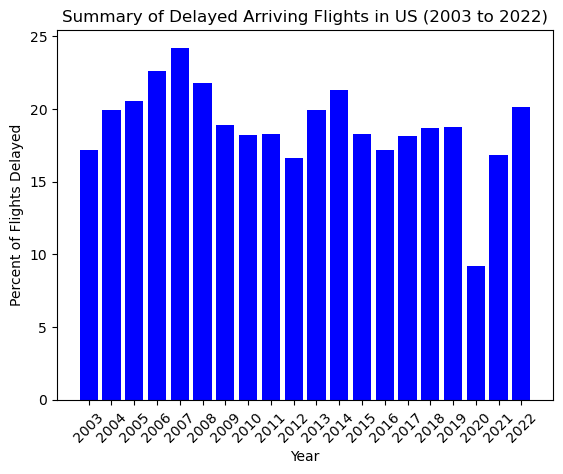

In [38]:
# Bar chart of the Percent Delayed column
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["% Delayed"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='b', align='center')


# Include plot title and axis labels
plt.title("Summary of Delayed Arriving Flights in US (2003 to 2022)")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Delayed")
plt.xticks(range(2003,2023))
plt.xticks(rotation=45)

plt.show()


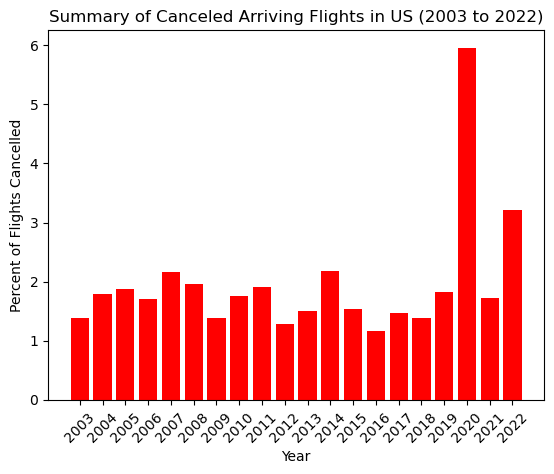

In [39]:
# Bar chart of the Percent Canceled column
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["% Cancelled"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='r', align='center')


# Include plot title and axis labels
plt.title("Summary of Canceled Arriving Flights in US (2003 to 2022)")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Cancelled")
plt.xticks(range(2003,2023))
plt.xticks(rotation=45)

plt.show()

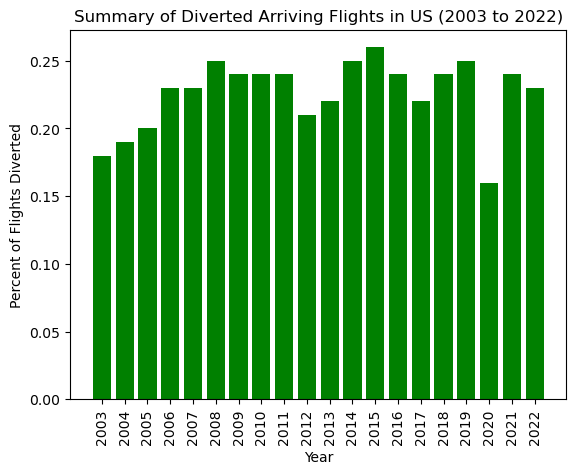

In [40]:
# Bar chart of the Percent Diverted column
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["% Diverted"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='g', align='center')


# Include plot title and axis labels
plt.title("Summary of Diverted Arriving Flights in US (2003 to 2022)")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Diverted")
plt.xticks(range(2003,2023))
plt.xticks(rotation=90)

plt.show()

# TO BE DISCUSSED AT PRESENTATION.  Graph automatically sets the y-axis 

In [41]:
##Total # of Delayed/Cancelled/Diverted Flights for all years for all carriers
print(f"---------------------Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------")

df2_AirlineDelayCleanDS_Status_Rollup.tail()

# Table 2

# FOR PRESENTATION - can use this table directly in the presentation

---------------------Summary of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------


,arr_flights,arr_del15,arr_cancelled,arr_diverted,% Delayed,% Cancelled,% Diverted
Year,,,,,,,
2018,6304506.0,1179152.0,87811.0,15265.0,18.70,1.39,0.24
2019,7422029.0,1389253.0,134918.0,18879.0,18.72,1.82,0.25
2020,4685808.0,431871.0,279063.0,7730.0,9.22,5.96,0.16
2021,5995392.0,1010332.0,103055.0,14117.0,16.85,1.72,0.24
2022,2733118.0,549829.0,88134.0,6169.0,20.12,3.22,0.23


In [44]:
#Check for distinct Airports.  These airport codes are only airports with at least 1 month with >50 weather delays by at least 1 airline carrier in 2018 to 2022
#airport codes: “PHL”,”EWR”,”LGA”,”IAD”,”ORD”,”MSP”,”DTW”,”DEN”,”SLC”,”LAX”,”SFO”,”SEA”,”ATL”,”CLT”,”BWI”,”MIA”,”DFW”,”IAH”

###########Number of Flights Delayed Due To Weather From 2003 - 2022 Per Airport (in months with > 50 weather delays)######
#Show the total number of flights delayed per airport.


df2_AirportDelay = df_AirlineDelayCleanDS[["Year","month","carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", 
                                                                                    "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"
                                                                                   ]] 

df3_AirportDelay = df2_AirportDelay[df2_AirportDelay["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'
                                                                                                                                             ]) 
                                                                                     ]
df4_AirportDelay_refinedAirports = df3_AirportDelay.reset_index(inplace=False)
# df4_AirlineDelay_refined = df3_AirlineDelay_refined[["carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

df5_AirportDelay_2003to2022 = pd.DataFrame(df4_AirportDelay_refinedAirports.groupby(["Year","airport"]).sum())

print(f"---------------------Number of Flight Delays for Any Reason in US in Selected Airports (2003 to 2022)-----------")
df5_AirportDelay_2003to2022


# Table 3

---------------------Number of Flight Delays for Any Reason in US in Selected Airports (2003 to 2022)-----------


index  month  arr_flights  arr_del15  carrier_ct  weather_ct  \
Year airport                                                                    
2003 ATL      24087849    693     215951.0    42141.0     7036.04     1807.22   
     BWI      24094746    693      58973.0     9589.0     2282.49      428.49   
     CLT      24093442    693      61879.0     9452.0     1852.84      279.81   
     DEN      29087523    844      86401.0    11260.0     4043.46      577.80   
     DFW      28473686    819     196508.0    27775.0     6604.96     1363.90   
...                ...    ...          ...        ...         ...         ...   
2022 ORD        298629    210     105415.0    19046.0     6958.70      714.16   
     PHL        271304    181      35175.0     7278.0     2659.88      201.11   
     SEA        231422    165      67417.0    11684.0     4114.05      437.27   
     SFO        209895    150      51670.0     8149.0     3548.53      281.88   
     SLC        249722    163      44860.0     6308.0     3259.78      378.60   

                nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
Year airport                                                           
2003 ATL      24384.83        76.55           8836.37         2505.0   
     BWI       3304.63        34.00           3539.38          564.0   
     CLT       4441.17         5.74           2872.34          835.0   
     DEN       4073.34        46.26           2519.08          537.0   
     DFW      11891.24        98.66           7816.25         2648.0   
...                ...          ...               ...            ...   
2022 ORD       5118.30        57.48           6197.33         3924.0   
     PHL       1871.99        27.76           2517.24         1189.0   
     SEA       3571.93        39.27           3521.54         1844.0   
     SFO       1671.24         9.85           2637.49         1082.0   
     SLC        935.26        11.12           1723.31          495.0   

              arr_diverted  
Year airport                
2003 ATL             232.0  
     BWI             164.0  
     CLT              81.0  
     DEN              60.0  
     DFW             565.0  
...                    ...  
2022 ORD             289.0  
     PHL              67.0  
     SEA             214.0  
     SFO              70.0  
     SLC              36.0  

[360 rows x 11 columns]

In [45]:
# FOR PRESENTATION 
# Shows total delays at each airport only for 2022 - that will be 18 values
# Insight: perhaps say something about the regional differences

df_AirlineDelayCleanDS_2022= df_AirlineDelayCleanDS[(df_AirlineDelayCleanDS["Year"]== 2022)]
    
df_AirlineDelayCleanDS_2022_refined = df_AirlineDelayCleanDS_2022[["Year","airport","arr_flights","arr_del15","carrier_ct","weather_ct"]]

df2_AirportDelay22 = df_AirlineDelayCleanDS_2022_refined[df_AirlineDelayCleanDS_2022_refined["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'])]

df2_AirportDelay22_Rollup = df2_AirportDelay22.groupby("airport").sum()

df2_AirportDelay_ArrDel15 = (df2_AirportDelay22_Rollup['arr_del15'] / df2_AirportDelay22_Rollup['arr_flights'])*100
df2_AirportDelay_Carrier = (df2_AirportDelay22_Rollup['carrier_ct'] / df2_AirportDelay22_Rollup['arr_del15'])*100
df2_AirportDelay_Weather = (df2_AirportDelay22_Rollup['weather_ct'] / df2_AirportDelay22_Rollup['arr_del15'])*100

####

df2_AirportDelay22_Rollup["% Any Delayed"] = round(df2_AirportDelay_ArrDel15,2) 
df2_AirportDelay22_Rollup["% Delayed d/t Airline"] = round(df2_AirportDelay_Carrier,2)
df2_AirportDelay22_Rollup["% Delayed d/t Weather"] = round(df2_AirportDelay_Weather,2)

df3_AirportDelay_2022_Percent = df2_AirportDelay22_Rollup[["arr_flights","arr_del15","carrier_ct","weather_ct","% Any Delayed","% Delayed d/t Airline","% Delayed d/t Weather"]]

print(f"---------------------Number of Flight Delays for Weather in US in Selected Airports (2022)-----------")
df3_AirportDelay_2022_Percent.groupby("airport").sum()

# Table 3a

---------------------Number of Flight Delays for Weather in US in Selected Airports (2022)-----------


,arr_flights,arr_del15,carrier_ct,weather_ct,% Any Delayed,% Delayed d/t Airline,% Delayed d/t Weather
airport,,,,,,,
ATL,129219.0,19885.0,7248.98,629.43,15.39,36.45,3.17
BWI,33654.0,7139.0,2395.81,120.00,21.21,33.56,1.68
CLT,78425.0,12402.0,3925.92,561.15,15.81,31.66,4.52
DEN,105809.0,21144.0,8276.03,534.04,19.98,39.14,2.53
DFW,112280.0,18602.0,6126.75,1040.05,16.57,32.94,5.59
DTW,53273.0,9592.0,4418.91,723.93,18.01,46.07,7.55
EWR,54130.0,15198.0,3671.61,376.46,28.08,24.16,2.48
IAD,22797.0,4185.0,1716.11,167.87,18.36,41.01,4.01
IAH,52568.0,9048.0,3687.39,354.30,17.21,40.75,3.92


In [46]:
# TEAM TO CODE THIS BAR GRAPH
# Include x axis as the airport and y-axis as the weather_ct
# This graph will show the total # of delayed fligts due to weather in 2022
# Not runnign yet - code to be finalized

# Bar chart of the Percent Diverted column
grouped = df3_AirportDelay_2022_Percent.groupby(['airport'])

hd = df3_AirportDelay_2022_Percent["% Any Delayed"]
y_axis = np.arange(len(hd))
plt.bar(airport,hd,width=0.8, bottom=None, color='g', align='center')


# Include plot title and axis labels
plt.title("Numebr of Delayed Flights Due to Weather at Airports With Historically High Weather-Related Delays (2022)")
plt.xlabel("Airline")
plt.ylabel("Percent of Flights Delayed")
plt.xticks(range("Airline"))
#note, xticks comes from the carrier_name value

plt.xticks(rotation=45)

plt.show()

# TO BE DISCUSSED AT PRESENTATION.  Graph automatically sets the y-axis 

NameError: name 'airport' is not defined

In [47]:
# TEAM TO CODE THIS BAR GRAPH
# Include x axis as the airport and y-axis as the "% Delayed d/t Weather"
# This graph will show the percentage # of delayed fligts due to weather in 2022
# Not running yet - code to be finalized

# Bar chart of the Percent Diverted column
grouped = df3_AirportDelay_2022_Percent.groupby(['airport'])

hd = df3_AirportDelay_2022_Percent["% Any Delayed"]
y_axis = np.arange(len(hd))
plt.bar(airport,hd,width=0.8, bottom=None, color='g', align='center')


# Include plot title and axis labels
plt.title("Numebr of Delayed Flights Due to Weather at Airports With Historically High Weather-Related Delays (2022)")
plt.xlabel("Airline")
plt.ylabel("Percent of Flights Delayed")
plt.xticks(range("Airline"))
#note, xticks comes from the carrier_name value

plt.xticks(rotation=45)

plt.show()

# TO BE DISCUSSED AT PRESENTATION.  Graph automatically sets the y-axis 
# INSIGHTS: THe airport with the greatest % of flgihts delayed due to weather may not be the one with the largest # of flights delayed due to weather.  
# This depends on how many total flights fly out of that airport and how many other delays there are for other reasons.  
# We can discuss if the order of th airports is not the same.

NameError: name 'airport' is not defined

In [48]:
# Show delays for all reasons in the airports identified with at least 1 month >50 weather delays in 2003 to 2022.
# Data are from 2003 to 2022
# Data are sorted in descending order showing airport with most delays in 20 years first

group_AllAirports_stat = group_AllAirports_stat.sort_values(by = ['arr_del15'], ascending = False) 

group_AllAirports_stat

,index,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
airport,,,,,,,,,,,
ATL,469951675,19102,7259395.0,1332668.0,305358.66,50103.83,567093.30,1621.97,408490.83,115050.0,15017.0
ORD,457578557,18190,5852102.0,1276665.0,237282.24,34302.92,591212.28,1487.06,412380.85,189134.0,13843.0
DFW,481650035,18800,5138128.0,923210.0,211367.72,42120.04,311691.59,1821.04,356209.69,123207.0,20979.0
LAX,505144731,19392,4008346.0,765651.0,220717.20,21685.84,263526.67,2416.70,257304.54,53084.0,4917.0
DEN,489565875,18565,4258252.0,749160.0,211351.75,23292.57,240236.39,1582.09,272697.62,68117.0,9897.0
SFO,463860089,17601,2766227.0,677788.0,140991.05,17414.48,326944.34,1133.71,191304.41,54635.0,5271.0
EWR,451291445,17645,2385120.0,670034.0,95736.00,18944.31,402901.67,981.70,151470.55,78364.0,8513.0
IAH,420890047,16612,3267954.0,574012.0,128570.08,19449.71,239177.05,1549.80,185265.29,50726.0,12696.0
LGA,471024263,18523,2120184.0,526977.0,97596.27,21817.78,289028.05,570.27,117964.96,82187.0,10073.0


In [49]:
# Bar chart of the Total Flights Delayed column (arr_del15)
All_Years_string = ["2003","2004","2005","2006","2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
AllYears = [int(i) for i in All_Years_string]

hd = df2_AirlineDelayCleanDS_Status_Rollup["Number of Delayed Flights"]
y_axis = np.arange(len(hd))
plt.bar(AllYears,hd,width=0.8, bottom=None, color='b', align='center')


# Include plot title and axis labels
plt.title("Number of Delayed Arriving Flights in US at Airports with Most Weather Dealys in 2018 to 2022")
plt.xlabel("Year")
plt.ylabel("Percent of Flights Delayed")
plt.xticks(range(2003,2023))
plt.xticks(rotation=45)

plt.show()

KeyError: 'Number of Delayed Flights'

In [50]:
# Tried to find the maximum from each column but did not work
# Can someone please help?

col_max = group_AllAirports_stat.max(axis=0)
col_max

index               5.051447e+08
month               1.967200e+04
arr_flights         7.259395e+06
arr_del15           1.332668e+06
carrier_ct          3.053587e+05
weather_ct          5.010383e+04
nas_ct              5.912123e+05
security_ct         2.416700e+03
late_aircraft_ct    4.123809e+05
arr_cancelled       1.891340e+05
arr_diverted        2.097900e+04
dtype: float64

In [51]:
# Calculate summary statistics for each airport for the 5 year period 1028 to 2022 period.  
# Can someone help here?  It will not limit to the last 5 years.

#Refine Data for years b/w 2018 and 2022
#group_AllAirports_18to22 = group_AllAirports_stat[(group_AllAirports_stat["year"]== 2022)] 
                                                                    #(group_AllAirports_stat["Year"] <= 2022) 
                                                                   #]
        
group_AllAirports_stat.columns
# group_AllAirports_18to22_stat = group_AllAirports_18to22.groupby("airport")
# summary_Airports_stat = group_AllAirports_18to22_stat['arr_del15'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

# summary_Airports_stat = summary_Airports_stat.sort_values(by = ['mean'], ascending = False) 

# #summary_AllAirlines_allyears_stat.rename(columns={'mean': 'Mean',
#                      #   'median': 'Median',
#                      #   'var': 'Variance',
#                      #   'std': 'Standard Deviation',
#                      #   'sem': 'Standard Error of the Mean'}, inplace=True)

# print(summary_Airports_allyears_stat)

# This shows the average number of dealys for any reason at all airports per year in US  
# *** FOR PRESENTATION ***
# What is the average number of delayed flights each year at each airport?  Plot the year, mean and SD.
# Insight:  Over the past 20 years, highest average delays are in Atlanta, Chicago, Dallas, Los Angeles and Denver. 



Index(['index', 'month', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted'],
      dtype='object')

In [52]:
# NOTE TO TEAM - SOMETHING IS WRING WITH THIS CODE.  
# It shows each ariport, but the average is not calculating per year or even the average for the 20 years.  
# Can someone please check?

# Calculate summary statistics for each airport for the whole 20-year period.  
group_AllAirports_stat = df5_AirportDelay_2003to2022.groupby(["airport"]).sum()
summary_Airports_allyears_stat = group_AllAirports_stat['arr_del15'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

summary_Airports_allyears_stat = summary_Airports_allyears_stat.sort_values(by = ['mean'], ascending = False) 

# #summary_AllAirlines_allyears_stat.rename(columns={'mean': 'Mean',
#                      #   'median': 'Median',
#                      #   'var': 'Variance',
#                      #   'std': 'Standard Deviation',
#                      #   'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_Airports_allyears_stat)

# This shows the average number of dealys for any reason at all airports per year in US  
# *** FOR PRESENTATION ***
# What is the average number of delayed flights each year at each airport?  Plot the year, mean and SD.
# Insight:  Over the past 20 years, highest average delays are in Atlanta, Chicago, Dallas, Los Angeles and Denver. 

TypeError: sort_values() got an unexpected keyword argument 'by'

In [53]:
#Check for distinct Airline Carriers.  These are the 5 largest airlines in the US based on fleet size.
#df2_AirlineDelay["carrier_name"].unique()
#########-----------------------------------------------------------------------------------###########################
###Pull for specific Airline Carriers: 'Delta Air Lines Inc.', 'American Airlines Inc.', ---'JetBlue Airways', 
                                    # 'Southwest Airlines Co.', 'United Air Lines Inc.','SkyWest Airlines Inc.'

    
df_AirlineCarrierDelay_refined = df_AirlineDelayCleanDS[
                                                        df_AirlineDelayCleanDS["carrier_name"].isin(['Delta Air Lines Inc.',
                                                                                                     'American Airlines Inc.',
                                                                                                     #'JetBlue Airways', 
                                                                                                     'Southwest Airlines Co.',
                                                                                                     'United Air Lines Inc.',
                                                                                                     'SkyWest Airlines Inc.'
                                                                                                     ]) 
                                                        ]
df_AirlineCarrierDelay_refined = df_AirlineCarrierDelay_refined.reset_index(inplace=False)
#df_AirlineCarrierDelay_refined["carrier_name"].unique()

#shows 1 row for each month that an airline carrier had arriving flihgts at an airport
print(f"----Summary of all arriving flights in US for 5 largest US arlines (per month per airport) (2003 to 2022)---")

df_AirlineCarrierDelay_refined

# Table 4

----Summary of all arriving flights in US for 5 largest US arlines (per month per airport) (2003 to 2022)---


,index,Year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,94,2022,5,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",285.0,57.0,23.84,...,0.00,27.27,2.0,0.0,3766.0,1194.0,86.0,281.0,0.0,2205.0
1,95,2022,5,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",89.0,26.0,9.87,...,0.14,9.10,0.0,0.0,1673.0,393.0,304.0,274.0,16.0,686.0
2,96,2022,5,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",54.0,16.0,9.71,...,0.00,5.22,3.0,0.0,894.0,598.0,15.0,33.0,0.0,248.0
3,97,2022,5,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",54.0,12.0,7.25,...,0.00,4.70,0.0,0.0,804.0,398.0,0.0,2.0,0.0,404.0
4,98,2022,5,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",529.0,157.0,56.03,...,1.66,65.52,6.0,0.0,9921.0,3223.0,657.0,1041.0,41.0,4959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121993,317256,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,...,0.00,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
121994,317257,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,...,0.00,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
121995,317258,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,...,0.00,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
121996,317259,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,...,0.00,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [54]:
# NOT WORKING 
### Calculate summary statistics for each airline for 2022.  

df_AirlineDelayCleanDS18to22 = df_AirlineDelayCleanDS[(df_AirlineDelayCleanDS["Year"]>= 2018) &  
                                                                    (df_AirlineDelayCleanDS["Year"] <= 2022) 
                                                                   ]

group_AllAirlines_stat = df_AirlineDelayCleanDS18to22.groupby("carrier_name")
summary_AllAirlines_5years_stat = group_AllAirlines_stat['arr_del15'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

summary_AllAirlines_5years_stat = summary_AllAirlines_5years_stat.sort_values(by = ['mean'], ascending = False) 

#summary_AllAirlines_allyears_stat.rename(columns={'mean': 'Mean',
                     #   'median': 'Median',
                     #   'var': 'Variance',
                     #   'std': 'Standard Deviation',
                     #   'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_AllAirlines_allyears_stat)###

# Use this to show how we identified the airlines with the most delays over the 20-year period.  
# What is the average number of delayed flights for each airline over all 20 years

NameError: name 'summary_AllAirlines_allyears_stat' is not defined

In [55]:
#Refine Data for years b/w 2018 and 2022
df_AirlineCarrierDelay5yrs_refined = df_AirlineCarrierDelay_refined[(df_AirlineCarrierDelay_refined["Year"]>= 2018) &  
                                                                    (df_AirlineCarrierDelay_refined["Year"] <= 2022) 
                                                                   ]
#Refine data for specified columns                             
df_AirlineCarrierDelay5yrs_refined_cols = df_AirlineCarrierDelay5yrs_refined[["Year","month","carrier_name","airport","airport_name","arr_flights","arr_del15",
                                                                              "carrier_ct", "weather_ct", "nas_ct","security_ct", "late_aircraft_ct","arr_cancelled",
                                                                              "arr_diverted","arr_delay", "carrier_delay", "weather_delay", "nas_delay","security_delay", 
                                                                              "late_aircraft_delay"
                                                                             ]] 

#shows 1 row for each month that an airline carrier had arriving flihgts at an airport
print(f"-----Summary of all arriving flights in US for 5 largest US arlines (per month per airport) (2018 to 2022)-----")
                         
df_AirlineCarrierDelay5yrs_refined_cols                       

# Table 5

-----Summary of all arriving flights in US for 5 largest US arlines (per month per airport) (2018 to 2022)-----


,Year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",285.0,57.0,23.84,1.12,4.76,0.00,27.27,2.0,0.0,3766.0,1194.0,86.0,281.0,0.0,2205.0
1,2022,5,American Airlines Inc.,ALB,"Albany, NY: Albany International",89.0,26.0,9.87,2.10,4.80,0.14,9.10,0.0,0.0,1673.0,393.0,304.0,274.0,16.0,686.0
2,2022,5,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",54.0,16.0,9.71,0.19,0.87,0.00,5.22,3.0,0.0,894.0,598.0,15.0,33.0,0.0,248.0
3,2022,5,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",54.0,12.0,7.25,0.00,0.05,0.00,4.70,0.0,0.0,804.0,398.0,0.0,2.0,0.0,404.0
4,2022,5,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",529.0,157.0,56.03,7.15,26.65,1.66,65.52,6.0,0.0,9921.0,3223.0,657.0,1041.0,41.0,4959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34232,2018,1,Southwest Airlines Co.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",1320.0,179.0,62.21,0.81,18.03,2.57,95.37,10.0,2.0,9005.0,3339.0,21.0,732.0,170.0,4743.0
34233,2018,1,Southwest Airlines Co.,STL,"St. Louis, MO: St Louis Lambert International",3044.0,420.0,128.53,4.59,67.13,0.88,218.87,51.0,1.0,18024.0,5729.0,238.0,2060.0,15.0,9982.0
34234,2018,1,Southwest Airlines Co.,TPA,"Tampa, FL: Tampa International",2420.0,452.0,148.16,7.98,101.92,0.00,193.94,44.0,1.0,21340.0,7206.0,753.0,3113.0,0.0,10268.0
34235,2018,1,Southwest Airlines Co.,TUL,"Tulsa, OK: Tulsa International",403.0,70.0,23.28,0.00,7.92,0.27,38.54,2.0,0.0,2322.0,844.0,0.0,236.0,4.0,1238.0


In [56]:
#####Total # of Delayed/Cancelled/Diverted Flights for 5 years for all carriers Rollup#########
#Last 5 years 
#df_AirlineCarrierDelay_Status_Status_Rollup.tail()
# arr_flights            float64
# arr_del15              float64
# arr_cancelled          float64
# arr_diverted           float64
# arr_del15 / arr_flights show as %
# arr_cancelled / arr_flights show as %
# arr_diverted / arr_flights show as %

#Refined entire dataset to "Year","arr_flights","arr_del15","arr_cancelled","arr_diverted"
df_AirlineCarrierDelay_Status = df_AirlineCarrierDelay5yrs_refined_cols[["Year","arr_flights","arr_del15","arr_cancelled","arr_diverted","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]]

#Aggregated Data by Year 
df_AirlineCarrierDelay_Status_Rollup = df_AirlineCarrierDelay_Status.groupby(["Year"]).sum()
#Calculate % amounts
df2_AirlineDelay_ArrDel15 = (df_AirlineCarrierDelay_Status_Rollup['arr_del15'] / df_AirlineCarrierDelay_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_ArrCancel = (df_AirlineCarrierDelay_Status_Rollup['arr_cancelled'] / df_AirlineCarrierDelay_Status_Rollup['arr_flights'])*100
df2_AirlineDelay_diverted = (df_AirlineCarrierDelay_Status_Rollup['arr_diverted'] / df_AirlineCarrierDelay_Status_Rollup['arr_flights'])*100

####

df_AirlineCarrierDelay_Status_Rollup["% Delayed"] = df2_AirlineDelay_ArrDel15 
df_AirlineCarrierDelay_Status_Rollup["% Cancelled"] = df2_AirlineDelay_ArrCancel 
df_AirlineCarrierDelay_Status_Rollup["% Diverted"] = df2_AirlineDelay_diverted


# Show aggrgegate delays from 2018 to 2022 in US only.  Includes data for ALL airlines

df_Delay_Cancel_Divert_Total = df_AirlineCarrierDelay_Status[["Year","arr_flights","arr_del15","arr_cancelled","arr_diverted"]]

print(f"------------Number of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------")


df_Delay_Cancel_Divert_Total

# df_AirlineDelayNASConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['nas_delay']/60
# df_AirlineDelayTotalMins5CarrMaxYr["arr_delay_hrs"] = df_AirlineDelayArrConvertToH

# Table 6

------------Number of Delayed, Cancelled and Diverted Arriving Flights in US (2018 to 2022)-----------


,Year,arr_flights,arr_del15,arr_cancelled,arr_diverted
0,2022,285.0,57.0,2.0,0.0
1,2022,89.0,26.0,0.0,0.0
2,2022,54.0,16.0,3.0,0.0
3,2022,54.0,12.0,0.0,0.0
4,2022,529.0,157.0,6.0,0.0
...,...,...,...,...,...
34232,2018,1320.0,179.0,10.0,2.0
34233,2018,3044.0,420.0,51.0,1.0
34234,2018,2420.0,452.0,44.0,1.0
34235,2018,403.0,70.0,2.0,0.0


In [57]:
#Refined entire dataset to "Year","arr_flights","arr_del15",all reasons for delays and % each delay contributed to toal # flight delays
df_Delay_AnyReasonPercent = df_AirlineCarrierDelay_Status[["Year","arr_flights","arr_del15","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]]

#Aggregated Data by Year 
# #Calculate % amounts
df2_AirlineDelay_AllDelays_Rollup = df_Delay_AnyReasonPercent.groupby(["Year"]).sum()

df2_AirlineDelay_ArrDel15 = (df2_AirlineDelay_AllDelays_Rollup['arr_del15'] / df2_AirlineDelay_AllDelays_Rollup['arr_flights'])*100
df2_AirlineDelay_Carrier = (df2_AirlineDelay_AllDelays_Rollup['carrier_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_Weather = (df2_AirlineDelay_AllDelays_Rollup['weather_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_NAS = (df2_AirlineDelay_AllDelays_Rollup['nas_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_Security = (df2_AirlineDelay_AllDelays_Rollup['security_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100
df2_AirlineDelay_late_aircraft = (df2_AirlineDelay_AllDelays_Rollup['late_aircraft_ct'] / df2_AirlineDelay_AllDelays_Rollup['arr_del15'])*100

####

df2_AirlineDelay_AllDelays_Rollup["% Delayed"] = round(df2_AirlineDelay_ArrDel15,2) 
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Airline"] = round(df2_AirlineDelay_Carrier,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Weather"] = round(df2_AirlineDelay_Weather,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t NAS"] = round(df2_AirlineDelay_NAS,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Security"] = round(df2_AirlineDelay_Security,2)
df2_AirlineDelay_AllDelays_Rollup["% Delayed d/t Late Aircraft"] = round(df2_AirlineDelay_late_aircraft,2)



print(f"---Number (%) of Delayed Arriving Flights as % of Total Delayed Flights Per Reason Reason for Delay in US (2018 to 2022)---")


df2_AirlineDelay_AllDelays_Rollup

#Tabe 7

---Number (%) of Delayed Arriving Flights as % of Total Delayed Flights Per Reason Reason for Delay in US (2018 to 2022)---


,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,% Delayed,% Delayed d/t Airline,% Delayed d/t Weather,% Delayed d/t NAS,% Delayed d/t Security,% Delayed d/t Late Aircraft
Year,,,,,,,,,,,,,
2018,4371808.0,790548.0,226006.97,27107.08,244985.35,1418.44,291030.28,18.08,28.59,3.43,30.99,0.18,36.81
2019,4765061.0,856478.0,250742.64,28094.33,257784.97,1596.94,318258.88,17.97,29.28,3.28,30.10,0.19,37.16
2020,3017259.0,251010.0,103124.45,12153.75,77105.35,779.56,57846.47,8.32,41.08,4.84,30.72,0.31,23.05
2021,3749286.0,635614.0,272410.20,27734.96,126010.44,2296.64,207162.07,16.95,42.86,4.36,19.82,0.36,32.59
2022,1756855.0,333916.0,141048.63,11527.60,67939.87,857.41,112542.43,19.01,42.24,3.45,20.35,0.26,33.70


In [58]:
# NOTE TO TEAM
# CREATE A PIE CHART of the data from 2022
# Include the data from the last 5 columns (from % d/t airine to % due to aircraft)
# INSIGHTS - discuss how each contributes to the overall amount of delayed flights.  
# Say that 333,916 (19.01%) flights were delayed of all 1,756,855 arriving flights in 2022.  
# Delays due to weather were a small contributor to the overall delays (3.45%).  THe most delays were due to the airline (42.24), eg, availablity of crew).

In [59]:
##################Find total the # of arrival delays per airline per year ############################
df_AirlineCarrierDelay_PerYear = pd.DataFrame(df_AirlineCarrierDelay5yrs_refined_cols.groupby(["carrier_name","Year"]).sum()["arr_del15"])
    
print(f"----Number of Delayed Arriving Flights for Any Reason in US Per Airline Per Year for each of the 5 Biggest US Airlines (2018 to 2022)-----")


df_AirlineCarrierDelay_PerYear

# Table 8

----Number of Delayed Arriving Flights for Any Reason in US Per Airline Per Year for each of the 5 Biggest US Airlines (2018 to 2022)-----


arr_del15
carrier_name           Year           
American Airlines Inc. 2018   180794.0
                       2019   195097.0
                       2020    59551.0
                       2021   124785.0
                       2022    64207.0
Delta Air Lines Inc.   2018   130189.0
                       2019   143021.0
                       2020    49920.0
                       2021    85961.0
                       2022    57299.0
SkyWest Airlines Inc.  2018    99571.0
                       2019   153115.0
                       2020    57969.0
                       2021   116693.0
                       2022    51928.0
Southwest Airlines Co. 2018   260350.0
                       2019   233109.0
                       2020    55942.0
                       2021   231992.0
                       2022   112765.0
United Air Lines Inc.  2018   119644.0
                       2019   132136.0
                       2020    27628.0
                       2021    76183.0
                       2022    47717.0

In [ ]:
# CREATE A Graph of the above data for the 5 years and 5 airlines

In [61]:
###########Total Delayed Flights For Any Reason For 5 Biggest Airlines########
#Refined  dataset (for the 5 carriers for 5 years) to "Year","arr_flights","arr_del15","arr_cancelled","arr_diverted"
df_AirlineDelay_5CarrierReasons = df_AirlineCarrierDelay5yrs_refined_cols[["Year","airport","carrier_name","arr_flights","arr_del15","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct" ]]

#Aggregated Data by Year 
df_AirlineDelay_5CarrierReasons_Rollup = df_AirlineDelay_5CarrierReasons.groupby(["Year"]).sum()

# #Calculate % amounts
df2_AirlineDelay_5CarrierDel15 = (df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_flights'])*100
df2_AirlineDelay_5Carrier = (df_AirlineDelay_5CarrierReasons_Rollup['carrier_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierWeather = (df_AirlineDelay_5CarrierReasons_Rollup['weather_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierNAS = (df_AirlineDelay_5CarrierReasons_Rollup['nas_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierSecurity = (df_AirlineDelay_5CarrierReasons_Rollup['security_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5Carrierlate_aircraft = (df_AirlineDelay_5CarrierReasons_Rollup['late_aircraft_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100


###Adding new columns which holds percentage amounts 
df_AirlineDelay_5CarrierReasons_Rollup["% Any Delayed"] =  round(df2_AirlineDelay_5CarrierDel15,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Airline"] = round(df2_AirlineDelay_5Carrier,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Weather"] = round(df2_AirlineDelay_5CarrierWeather,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t NAS"] = round(df2_AirlineDelay_5CarrierNAS,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Security"] = round(df2_AirlineDelay_5CarrierSecurity,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Late Aircraft"] = round(df2_AirlineDelay_5Carrierlate_aircraft,2)

print(f"-----Total (%) Delayed Flights For Any Reason For 5 Biggest Airlines (Aggregated) (2018 to 2022)---------")
df_AirlineDelay_5CarrierReasons_Rollup

# Table 9

-----Total (%) Delayed Flights For Any Reason For 5 Biggest Airlines (Aggregated) (2018 to 2022)---------


,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,% Any Delayed,% Delayed d/t Airline,% Delayed d/t Weather,% Delayed d/t NAS,% Delayed d/t Security,% Delayed d/t Late Aircraft
Year,,,,,,,,,,,,,
2018,4371808.0,790548.0,226006.97,27107.08,244985.35,1418.44,291030.28,18.08,28.59,3.43,30.99,0.18,36.81
2019,4765061.0,856478.0,250742.64,28094.33,257784.97,1596.94,318258.88,17.97,29.28,3.28,30.10,0.19,37.16
2020,3017259.0,251010.0,103124.45,12153.75,77105.35,779.56,57846.47,8.32,41.08,4.84,30.72,0.31,23.05
2021,3749286.0,635614.0,272410.20,27734.96,126010.44,2296.64,207162.07,16.95,42.86,4.36,19.82,0.36,32.59
2022,1756855.0,333916.0,141048.63,11527.60,67939.87,857.41,112542.43,19.01,42.24,3.45,20.35,0.26,33.70


In [62]:
# Refine Table 8 grouping it by airline

#Aggregated Data by Year 
df_AirlineDelay_5CarrierReasons_Rollup = df_AirlineDelay_5CarrierReasons.groupby(["carrier_name","Year"]).sum()

# #Calculate % amounts
df2_AirlineDelay_5CarrierDel15 = (df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_flights'])*100
df2_AirlineDelay_5Carrier = (df_AirlineDelay_5CarrierReasons_Rollup['carrier_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierWeather = (df_AirlineDelay_5CarrierReasons_Rollup['weather_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierNAS = (df_AirlineDelay_5CarrierReasons_Rollup['nas_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5CarrierSecurity = (df_AirlineDelay_5CarrierReasons_Rollup['security_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100
df2_AirlineDelay_5Carrierlate_aircraft = (df_AirlineDelay_5CarrierReasons_Rollup['late_aircraft_ct'] / df_AirlineDelay_5CarrierReasons_Rollup['arr_del15'])*100


###Adding new columns which holds percentage amounts 
df_AirlineDelay_5CarrierReasons_Rollup["% Any Delayed"] =  round(df2_AirlineDelay_5CarrierDel15,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Airline"] = round(df2_AirlineDelay_5Carrier,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Weather"] = round(df2_AirlineDelay_5CarrierWeather,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t NAS"] = round(df2_AirlineDelay_5CarrierNAS,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Security"] = round(df2_AirlineDelay_5CarrierSecurity,2)
df_AirlineDelay_5CarrierReasons_Rollup["% Delayed d/t Late Aircraft"] = round(df2_AirlineDelay_5Carrierlate_aircraft,2)

df_5CarrierDelayrPercent = df_AirlineDelay_5CarrierReasons_Rollup[["arr_flights","arr_del15","% Any Delayed","% Delayed d/t Airline","% Delayed d/t Weather", "% Delayed d/t NAS","% Delayed d/t Security","% Delayed d/t Late Aircraft"]]

print(f"-----Total (%) Delayed Flights For Any Reason Per Airline For 5 Biggest Airlines (Aggregated) (2018 to 2022)------")
df_5CarrierDelayrPercent

# Table 10


-----Total (%) Delayed Flights For Any Reason Per Airline For 5 Biggest Airlines (Aggregated) (2018 to 2022)------


arr_flights  arr_del15  % Any Delayed  \
carrier_name           Year                                          
American Airlines Inc. 2018     916818.0   180794.0          19.72   
                       2019     946776.0   195097.0          20.61   
                       2020     569751.0    59551.0          10.45   
                       2021     736397.0   124785.0          16.95   
                       2022     344360.0    64207.0          18.65   
Delta Air Lines Inc.   2018     949283.0   130189.0          13.71   
                       2019     991985.0   143021.0          14.42   
                       2020     581082.0    49920.0           8.59   
                       2021     747998.0    85961.0          11.49   
                       2022     356460.0    57299.0          16.07   
SkyWest Airlines Inc.  2018     531591.0    99571.0          18.73   
                       2019     836444.0   153115.0          18.31   
                       2020     596972.0    57969.0           9.71   
                       2021     753414.0   116693.0          15.49   
                       2022     309562.0    51928.0          16.77   
Southwest Airlines Co. 2018    1352552.0   260350.0          19.25   
                       2019    1363946.0   233109.0          17.09   
                       2020     961276.0    55942.0           5.82   
                       2021    1064640.0   231992.0          21.79   
                       2022     503079.0   112765.0          22.41   
United Air Lines Inc.  2018     621564.0   119644.0          19.25   
                       2019     625910.0   132136.0          21.11   
                       2020     308178.0    27628.0           8.96   
                       2021     446837.0    76183.0          17.05   
                       2022     243394.0    47717.0          19.60   

                             % Delayed d/t Airline  % Delayed d/t Weather  \
carrier_name           Year                                                 
American Airlines Inc. 2018                  30.58                   3.95   
                       2019                  30.59                   3.35   
                       2020                  37.34                   3.60   
                       2021                  38.59                   4.21   
                       2022                  35.10                   3.39   
Delta Air Lines Inc.   2018                  30.35                   5.30   
                       2019                  31.19                   3.73   
                       2020                  35.80                   3.16   
                       2021                  43.39                   3.72   
                       2022                  43.45                   3.04   
SkyWest Airlines Inc.  2018                  22.04                   3.95   
                       2019                  25.33                   4.71   
                       2020                  57.66                  10.56   
                       2021                  60.49                  10.95   
                       2022                  63.59                  10.69   
Southwest Airlines Co. 2018                  31.64                   1.75   
                       2019                  34.19                   1.73   
                       2020                  38.48                   2.42   
                       2021                  39.32                   1.30   
                       2022                  38.54                   0.90   
United Air Lines Inc.  2018                  22.48                   3.82   
                       2019                  21.16                   3.77   
                       2020                  29.19                   3.47   
                       2021                  33.01                   4.58   
                       2022                  35.91                   2.18   

                             % Delayed d/t NAS  % Delayed 

In [64]:
# Based onthe table above, create a graph of the 5 airlines and the % weather delays in 2022 only
# We will see SKyWest has the most

In [65]:
#Check for distinct Airports.  These airport codes are only airports with at least 1 month with >50 weather delays by at least 1 airline carrier in 2018 to 2022
#airport codes: “PHL”,”EWR”,”LGA”,”IAD”,”ORD”,”MSP”,”DTW”,”DEN”,”SLC”,”LAX”,”SFO”,”SEA”,”ATL”,”CLT”,”BWI”,”MIA”,”DFW”,”IAH”

#######Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport (in months with > 50 weather delays)######
#Show the total number of flights delayed per airport.


df2_AirportDelay = df_AirlineDelayCleanDS[["Year","month","carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", 
                                                                                    "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"
                                                                                   ]] 

df3_AirportDelay = df2_AirportDelay[df2_AirportDelay["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'
                                                                                                                                             ]) 
                                                                                     ]
#Refine Data for years b/w 2018 and 2022
df_Airport_anyreason_2018to2022 = df3_AirportDelay[(df3_AirportDelay["Year"]>= 2018) &(df3_AirportDelay["Year"] <= 2022)]

df4_AirportDelay_refinedAirports_2018to2022 = df_Airport_anyreason_2018to2022.reset_index(inplace=False)
# df4_AirlineDelay_refined = df3_AirlineDelay_refined[["carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

df5_AirportDelay_2018to2022 = pd.DataFrame(df4_AirportDelay_refinedAirports_2018to2022.groupby(["Year","airport"]).sum())

df5_AirportDelay_2018to2022[["arr_flights", "arr_del15", "carrier_ct","weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

print(f"----------Number of Flight Delays for Any Reason in US in Selected Airports (2018 to 2022)----------")
df5_AirportDelay_2018to2022

# Table 11

----------Number of Flight Delays for Any Reason in US in Selected Airports (2018 to 2022)----------


index  month  arr_flights  arr_del15  carrier_ct  weather_ct  \
Year airport                                                                    
2018 ATL      12033400   1066     354741.0    53850.0    13534.46     2064.97   
     BWI      10459320    891     104129.0    17409.0     5108.40      509.77   
     CLT      10424015    927     165199.0    24814.0     6937.99      880.20   
     DEN      10653366    881     235614.0    39565.0    10649.50     1098.93   
     DFW      10733456    945     218659.0    42260.0     9930.76     1753.54   
...                ...    ...          ...        ...         ...         ...   
2022 ORD        298629    210     105415.0    19046.0     6958.70      714.16   
     PHL        271304    181      35175.0     7278.0     2659.88      201.11   
     SEA        231422    165      67417.0    11684.0     4114.05      437.27   
     SFO        209895    150      51670.0     8149.0     3548.53      281.88   
     SLC        249722    163      44860.0     6308.0     3259.78      378.60   

                nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
Year airport                                                           
2018 ATL      19246.35        73.96          18930.12         2295.0   
     BWI       4822.76        50.66           6917.44         2259.0   
     CLT       7291.48        32.66           9671.65         3744.0   
     DEN      11901.57        70.32          15844.59         1910.0   
     DFW      14962.04        80.40          15533.22         4085.0   
...                ...          ...               ...            ...   
2022 ORD       5118.30        57.48           6197.33         3924.0   
     PHL       1871.99        27.76           2517.24         1189.0   
     SEA       3571.93        39.27           3521.54         1844.0   
     SFO       1671.24         9.85           2637.49         1082.0   
     SLC        935.26        11.12           1723.31          495.0   

              arr_diverted  
Year airport                
2018 ATL             621.0  
     BWI             301.0  
     CLT             330.0  
     DEN             696.0  
     DFW            1011.0  
...                    ...  
2022 ORD             289.0  
     PHL              67.0  
     SEA             214.0  
     SFO              70.0  
     SLC              36.0  

[90 rows x 11 columns]

In [66]:
###########Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport and Airline (in months with > 50 weather delays)######
#Show the total number of flights delayed per airport for the 5 airlines.
#airline, then airport

df2_AirlineCarrierDelay5yrs_refined_cols = df_AirlineCarrierDelay5yrs_refined_cols[["Year","carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", 
                                                                                    "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"
                                                                                   ]] 

df_AirlineCarrierDelay5yrs_refinedAirports = df2_AirlineCarrierDelay5yrs_refined_cols[ 
                                                                                    df2_AirlineCarrierDelay5yrs_refined_cols["airport"].isin([
                                                                                                                                             'PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'
                                                                                                                                             ]) 
                                                                                     ]
df2_AirlineCarrierDelay5yrs_refinedAirports = df_AirlineCarrierDelay5yrs_refinedAirports.reset_index(inplace=False)
# df4_AirlineDelay_refined = df3_AirlineDelay_refined[["carrier_name","airport", "arr_flights", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct","late_aircraft_ct", "arr_cancelled", "arr_diverted"]]

df_AirportDelayGreater50 = df2_AirlineCarrierDelay5yrs_refinedAirports[(df2_AirlineCarrierDelay5yrs_refinedAirports["weather_ct"] >= 50)]
df2_AirportDelayGreater50 = pd.DataFrame(df_AirportDelayGreater50.groupby(["Year","airport","carrier_name"]).sum())

print(f"--Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport and Airline (in months with > 50 weather delays) --")
df2_AirportDelayGreater50
#df7_AirportDelayGreater50 = df6_AirportDelay_refined[(df6_AirportDelay_refined["weather_ct"] >= 50)]

##############Validation Section#########################################################
#df_AirportDelayGreater50 ["airport"].unique()
#df_AirportDelayGreater50["Year"].unique()

# Table 12

--Number of Flights Delayed Due To Weather From 2018 - 2022 Per Airport and Airline (in months with > 50 weather delays) --


index  arr_flights  arr_del15  \
Year airport carrier_name                                             
2018 ATL     Delta Air Lines Inc.    336439     223820.0    30350.0   
     BWI     Southwest Airlines Co.   30570       6606.0     1632.0   
     CLT     American Airlines Inc.  121439      32431.0     5734.0   
     DEN     Southwest Airlines Co.   30579       6258.0     1437.0   
             United Air Lines Inc.    29887       5876.0     1044.0   
...                                     ...          ...        ...   
2022 LAX     SkyWest Airlines Inc.     4861       7849.0     1083.0   
     MSP     SkyWest Airlines Inc.     8883      14914.0     2862.0   
     ORD     SkyWest Airlines Inc.     2471       4260.0      941.0   
     SEA     SkyWest Airlines Inc.     3196       1676.0      237.0   
     SLC     SkyWest Airlines Inc.     6194       9570.0     1013.0   

                                     carrier_ct  weather_ct    nas_ct  \
Year airport carrier_name                                               
2018 ATL     Delta Air Lines Inc.       7405.30     1314.62  11379.63   
     BWI     Southwest Airlines Co.      402.87       65.36    513.58   
     CLT     American Airlines Inc.     1608.47      296.02   1625.27   
     DEN     Southwest Airlines Co.      407.20       59.29    348.67   
             United Air Lines Inc.       283.80       67.00    313.77   
...                                         ...         ...       ...   
2022 LAX     SkyWest Airlines Inc.       629.00      126.00     15.00   
     MSP     SkyWest Airlines Inc.      2070.00      705.00     44.00   
     ORD     SkyWest Airlines Inc.       408.00       57.00     65.00   
     SEA     SkyWest Airlines Inc.       143.00       56.00      8.00   
     SLC     SkyWest Airlines Inc.       677.00      205.00     18.00   

                                     security_ct  late_aircraft_ct  \
Year airport carrier_name                                            
2018 ATL     Delta Air Lines Inc.          21.93          10228.48   
     BWI     Southwest Airlines Co.         5.43            644.76   
     CLT     American Airlines Inc.         5.27           2198.97   
     DEN     Southwest Airlines Co.         5.42            616.42   
             United Air Lines Inc.          0.00            379.43   
...                                          ...               ...   
2022 LAX     SkyWest Airlines Inc.          2.00            311.00   
     MSP     SkyWest Airlines Inc.         13.00             30.00   
     ORD     SkyWest Airlines Inc.          1.00            410.00   
     SEA     SkyWest Airlines Inc.          0.00             30.00   
     SLC     SkyWest Airlines Inc.          4.00            109.00   

                                     arr_cancelled  arr_diverted  
Year airport carrier_name                                         
2018 ATL     Delta Air Lines Inc.            831.0         430.0  
     BWI     Southwest Airlines Co.          345.0          39.0  
     CLT     American Airlines Inc.          567.0          95.0  
     DEN     Southwest Airlines Co.          109.0          39.0  
             United Air Lines Inc.            48.0          32.0  
...                                            ...           ...  
2022 LAX     SkyWest Airlines Inc.           165.0          11.0  
     MSP     SkyWest Airlines Inc.           400.0          30.0  
     ORD     SkyWest Airlines Inc.           340.0          18.0  
     SEA     SkyWest Airlines Inc.           129.0          35.0  
     SLC     SkyWest Airlines Inc.            84.0           0.0  

[71 rows x 10 columns]

In [67]:
#Carriers with arr_del15 > 50 per Airport
#Show the total number of months with >50 delays due to weather per month by any one of the 5 airlines


df_AirlineDelayCleanDS

df_AirlineDelayGreater50_2003to2022 = df_AirlineDelayCleanDS[(df_AirlineDelayCleanDS["weather_ct"] >= 50)]
df_AirlineDelayGreater50WeatherCt_2003to2022 = df_AirlineDelayGreater50_2003to2022.sort_values(by = ['weather_ct'], ascending = False) 
df_Airport_AllMonths50WeatherDelay = df_AirlineDelayGreater50WeatherCt_2003to2022[df_AirlineDelayGreater50WeatherCt_2003to2022["airport"].isin(['PHL','EWR','LGA','IAD','ORD','MSP','DTW','DEN','SLC','LAX','SFO','SEA','ATL','CLT','BWI','MIA','DFW','IAH'])]
                                                                                  
df_Airport_AllMonths50WeatherDelay.groupby(["Year", "month", "airport"]).sum()

# df_Airport_AllMonths50WeatherDelay     

# Table 13

arr_flights  arr_del15  carrier_ct  weather_ct   nas_ct  \
Year month airport                                                            
2003 6     ATL          22815.0     4315.0      793.30      230.98  2434.26   
           DFW          16220.0     2878.0      573.42      159.36  1343.96   
           IAH           6049.0      973.0       84.18       58.48   503.34   
           MIA           3120.0      723.0      146.14       53.18   390.58   
           MSP           9607.0     1211.0      301.54       85.02   547.12   
...                         ...        ...         ...         ...      ...   
2022 5     ATL          18297.0     2573.0     1012.39       95.51   501.03   
           CLT          13723.0     2561.0      636.20      212.52   644.70   
           DFW          19023.0     3664.0     1206.67      371.47   687.53   
           DTW           2640.0      401.0      318.00       58.00     1.00   
           MSP           3236.0      543.0      420.00      105.00     9.00   

                    security_ct  late_aircraft_ct  arr_cancelled  \
Year month airport                                                 
2003 6     ATL            13.83            842.63          187.0   
           DFW            14.44            786.82          245.0   
           IAH             4.60            322.40           53.0   
           MIA             1.84            131.26           20.0   
           MSP             9.40            267.92           81.0   
...                         ...               ...            ...   
2022 5     ATL             0.52            963.54          444.0   
           CLT             7.81           1059.77          214.0   
           DFW            10.59           1387.75          276.0   
           DTW             2.00             22.00           16.0   
           MSP             5.00              4.00           20.0   

                    arr_diverted  arr_delay  carrier_delay  weather_delay  \
Year month airport                                                          
2003 6     ATL              17.0   194383.0        49195.0        13809.0   
           DFW              82.0   160418.0        44543.0        12309.0   
           IAH              81.0    53479.0         5956.0         6789.0   
           MIA              13.0    35978.0         7978.0         3083.0   
           MSP               8.0    59368.0        22001.0         5007.0   
...                          ...        ...            ...            ...   
2022 5     ATL              23.0   193784.0       102534.0         7741.0   
           CLT              38.0   212753.0        65879.0        19531.0   
           DFW              38.0   330937.0       126651.0        35202.0   
           DTW               0.0    46878.0        39518.0         4845.0   
           MSP              13.0    59551.0        45585.0        12516.0   

                    nas_delay  security_delay  late_aircraft_delay  
Year month airport                                                  
2003 6     ATL        87859.0           362.0              43158.0  
           DFW        56275.0           484.0              46807.0  
           IAH        22028.0           131.0              18575.0  
           MIA        16535.0            66.0               8316.0  
           MSP        16147.0           528.0              15685.0  
...                       ...             ...                  ...  
2022 5     ATL        19640.0            34.0              63835.0  
           CLT        32263.0           237.0              94843.0  
           DFW        36603.0           331.0             132150.0  
           DTW           65.0            61.0               2389.0  
           MSP         1041.0           164.0                245.0  

[1053 rows x 15 columns]

In [68]:
#Total minutes of delays in all US for delayed flights for 5 years any reason for 5 airline carriers
df_AirlineDelayTotalMins5Carriers = df_AirlineDelayGreater50WeatherCt[["Year","carrier_name","arr_delay","carrier_delay","weather_delay", "nas_delay", 
                                                                       "security_delay","late_aircraft_delay"
                                                                     ]]
df_AirlineDelayTotalMins5Carriers.sort_values(by = ['arr_delay'], ascending = False)

NameError: name 'df_AirlineDelayGreater50WeatherCt' is not defined

In [69]:
#Airline Carriers that had the highest delays for each year
df_AirlineDelayTotalMins5CarrMaxYr =df_AirlineDelayTotalMins5Carriers.groupby(df_AirlineDelayTotalMins5Carriers['year']).max()
df_AirlineDelayTotalMins5CarrMaxYr 

NameError: name 'df_AirlineDelayTotalMins5Carriers' is not defined

In [ ]:
df_AirlineDelayArrConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['arr_delay']/60
df_AirlineDelayCarrConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['carrier_delay']/60
df_AirlineDelayWeatherConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['weather_delay']/60
df_AirlineDelayNASConvertToHrs= df_AirlineDelayTotalMins5CarrMaxYr['nas_delay']/60
df_AirlineDelayTotalMins5CarrMaxYr["arr_delay_hrs"] = df_AirlineDelayArrConvertToHrs
df_AirlineDelayTotalMins5CarrMaxYr["carrier_delay_hrs"] = df_AirlineDelayCarrConvertToHrs
df_AirlineDelayTotalMins5CarrMaxYr["weather_delay_hrs"] = df_AirlineDelayWeatherConvertToHrs
df_AirlineDelayTotalMins5CarrMaxYr

In [ ]:
#
df_AirlineDelayGreater50WeatherCt.groupby("month").max()["weather_ct"]

In [ ]:
df_AirlineDelayGreater50WeatherCt.max(axis=0)

In [ ]:
#df_AirlineDelayGreater50WeatherCt.groupby(["carrier_name","Year","month"]).sum().head(20)
df_AirlineDelayGreater50WeatherCt.groupby(["carrier_name","Year","month"]).sum().tail(20)

In [ ]:
df_AirlineDelayGreater50WeatherCt.to_csv(AirlineDelay_CleanOutput)